In [4]:
from sklearn import datasets
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

data = datasets.load_boston()

print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(data.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
# without a constant

X = df["RM"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          3.74e-256
Time:                        16:31:44   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.0

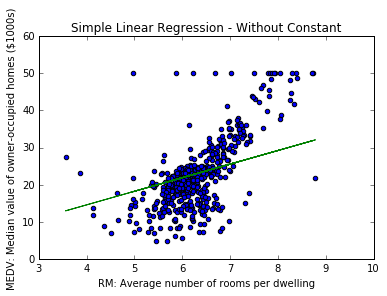

In [12]:
plt.scatter(X, y)
plt.plot(X, predictions, color='g')
plt.xlabel('RM: Average number of rooms per dwelling')
plt.ylabel('MEDV: Median value of owner-occupied homes ($1000s)')
plt.title('Simple Linear Regression - Without Constant')
plt.show()

In [13]:
X_c = sm.add_constant(X)

model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        16:34:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

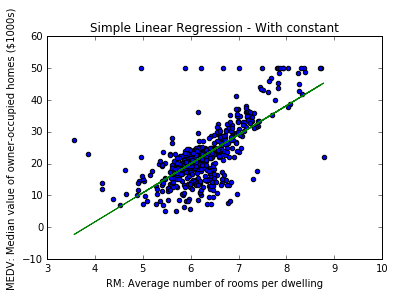

In [14]:
plt.scatter(X, y)
plt.plot(X, predictions, color='g')
plt.xlabel('RM: Average number of rooms per dwelling')
plt.ylabel('MEDV: Median value of owner-occupied homes ($1000s)')
plt.title('Simple Linear Regression - With constant')
plt.show()
plt.close()

In [15]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 05 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:39:33   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.0

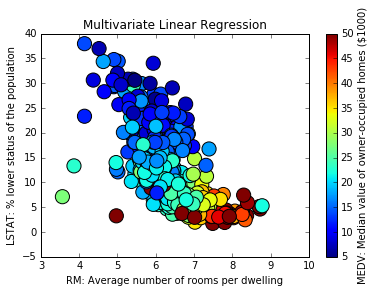

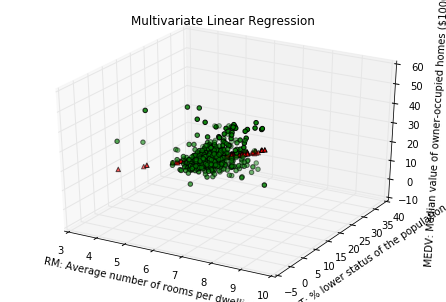

In [16]:
fig, ax = plt.subplots()
scat = ax.scatter(X["RM"], X["LSTAT"], c=y, s=200, marker='o')
fig.colorbar(scat, label='MEDV: Median value of owner-occupied homes ($1000)')
plt.xlabel("RM: Average number of rooms per dwelling")
plt.ylabel("LSTAT: % lower status of the population")
plt.title("Multivariate Linear Regression")
plt.show()
plt.close()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X["RM"], X["LSTAT"], y, c='g', marker='o')
ax.scatter(X["RM"], X["LSTAT"], predictions, c='r', marker='^')
ax.set_xlabel("RM: Average number of rooms per dwelling")
ax.set_ylabel("LSTAT: % lower status of the population")
ax.set_zlabel("MEDV: Median value of owner-occupied homes ($1000)")
plt.title("Multivariate Linear Regression")
plt.show()

In [17]:
from sklearn import linear_model

X = df.loc[:, "RM":"RM"]
y = target["MEDV"]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print("Linear regression score: %f " % lm.score(X, y))

print("Linear model coefficients: %f " % lm.coef_)

print("Linear model y intercept: %f " % lm.intercept_)

Linear regression score: 0.483525 
Linear model coefficients: 9.102109 
Linear model y intercept: -34.670621 


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


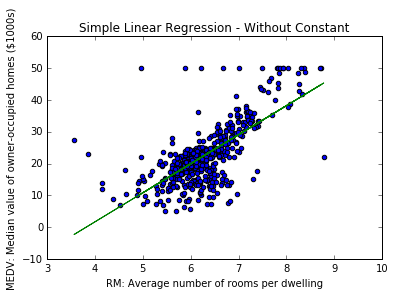

In [18]:
plt.scatter(X, y)
plt.plot(X, predictions, color='g')
plt.xlabel('RM: Average number of rooms per dwelling')
plt.ylabel('MEDV: Median value of owner-occupied homes ($1000s)')
plt.title('Simple Linear Regression - Without Constant')
plt.show()
plt.close()